In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import scipy.stats as st
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import re

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\data.csv")

In [4]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [5]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [6]:
df.shape

(8518, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [8]:
df['Ratings'].value_counts()

5    5080
4    1746
1     769
3     615
2     308
Name: Ratings, dtype: int64

<AxesSubplot:xlabel='Ratings', ylabel='count'>

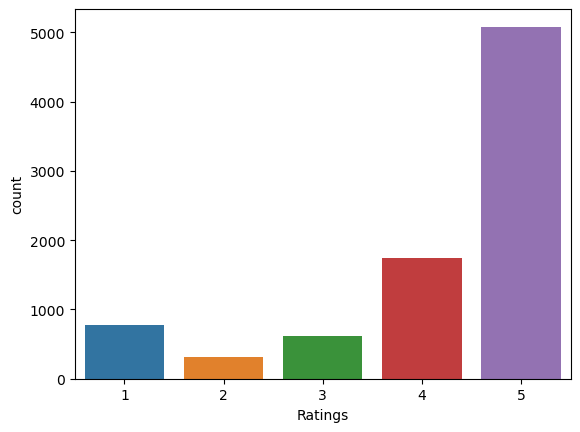

In [9]:
sns.countplot(x='Ratings', data=df)

In [10]:
pos_neg = []
for i in range(len(df['Ratings'])):
    if df['Ratings'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

df['label'] = pos_neg


In [11]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                          for token in nltk.word_tokenize(sentence)
                                          if token.lower() not in stopwords.words('english')))
    return preprocessed_text

     


In [12]:
if not isinstance(df['Review text'].values, str):
    df['Review text'] = df['Review text'].values.astype(str)

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
preprocessed_review = preprocess_text(df['Review text'].values)
df['Review text'] = preprocessed_review

100%|█████████████████████████████████████████████████████████████████████████████| 8518/8518 [00:20<00:00, 418.86it/s]


In [15]:
df["label"].value_counts()

1    5080
0    3438
Name: label, dtype: int64

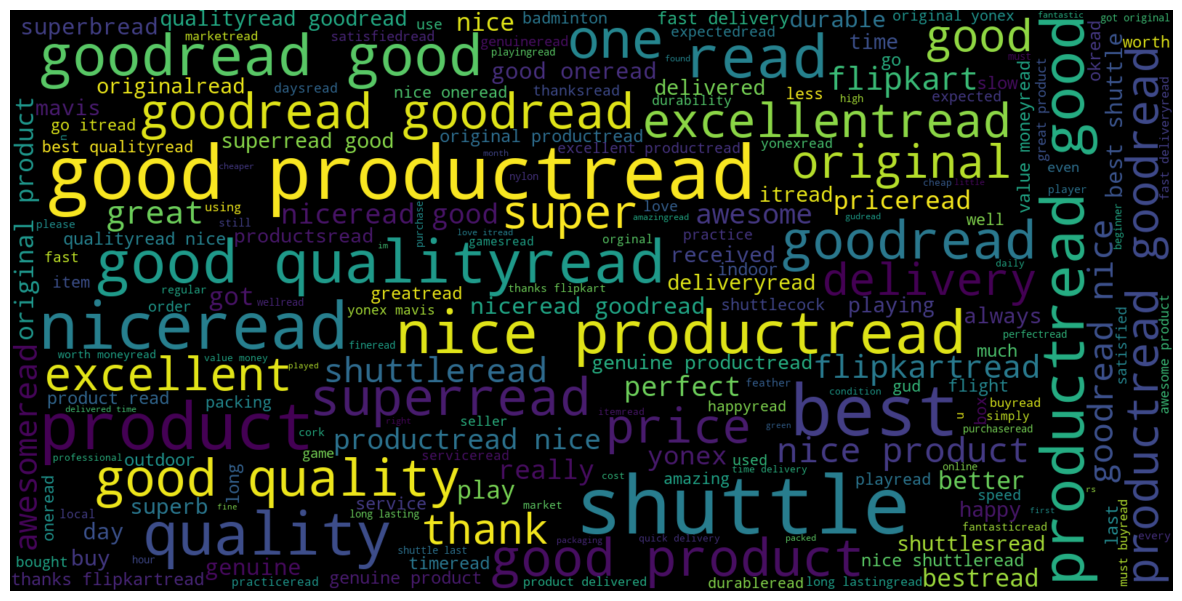

In [16]:
consolidated = ' '.join(
    word for word in df['Review text'][df['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['Review text'] ).toarray()


In [18]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['label'],test_size=0.33,stratify=df['label'],random_state = 42)


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

pred = model.predict(X_train)
print(accuracy_score(y_train,pred))


0.8389696863500964


In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_train)
print( accuracy_score(y_train, rf_pred))


0.8389696863500964


In [22]:
from sklearn.svm import SVC
svc_model = SVC(random_state=0)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_train)
print( accuracy_score(y_train, svc_pred))


0.8112843875941825


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_train)
print( accuracy_score(y_train, gb_pred))

0.7163132994568074


In [24]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Assuming X_train and y_train are your training data
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Specify the file path to save the model
file_path = 'rf_model.pkl'

# Save the trained model to a .pkl file
joblib.dump(rf_model, file_path)


['rf_model.pkl']

In [25]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Specify the file name
file_name = r'C:\Users\hp\Downloads\rf_model.pkl'

# Construct the file path
file_path = os.path.join(current_directory, file_name)

# Check if the file exists
if os.path.exists(file_path):
    print(f"The file '{file_name}' is located at: {file_path}")
else:
    print(f"The file '{file_name}' does not exist in the current directory.")


The file 'C:\Users\hp\Downloads\rf_model.pkl' is located at: C:\Users\hp\Downloads\rf_model.pkl


In [26]:
try:
    # Save the trained model to the specified directory
    joblib.dump(rf_model, file_path)
    print("Model saved successfully at:", file_path)
except Exception as e:
    print("Error occurred while saving the model:", e)

Model saved successfully at: C:\Users\hp\Downloads\rf_model.pkl


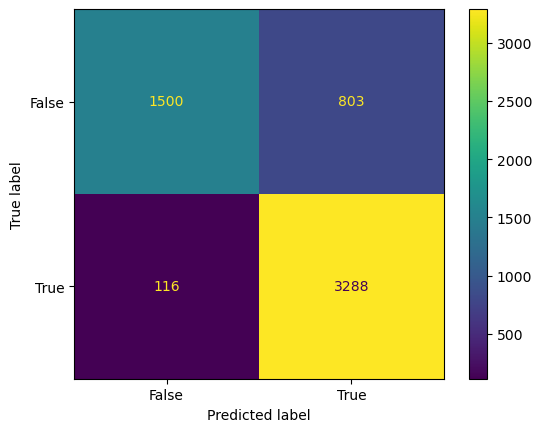

In [27]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = [False, True])

cm_display.plot()
plt.show()


In [28]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense


In [30]:
pip install --upgrade numpy


Note: you may need to restart the kernel to use updated packages.


In [31]:
input_shape = X_train.shape[1:]

In [32]:
mlp_model = Sequential([
    Input(shape=input_shape),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
     

In [33]:
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print("MLP Accuracy:", mlp_accuracy)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5902 - loss: 0.6716 - val_accuracy: 0.6953 - val_loss: 0.6106
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7176 - loss: 0.5624 - val_accuracy: 0.7128 - val_loss: 0.5860
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7783 - loss: 0.4792 - val_accuracy: 0.6988 - val_loss: 0.6125
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7929 - loss: 0.4400 - val_accuracy: 0.6602 - val_loss: 0.6343
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8019 - loss: 0.4144 - val_accuracy: 0.6489 - val_loss: 0.6737
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8021 - loss: 0.4077 - val_accuracy: 0.6996 - val_loss: 0.6744
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8131 - loss: 0.3864 - val_accuracy: 0.6935 - val_loss: 0.7006
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8108 - loss: 0.3764 - val_accuracy: 0.

In [34]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print("CNN Accuracy:", cnn_accuracy)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - accuracy: 0.6433 - loss: 0.6324 - val_accuracy: 0.7215 - val_loss: 0.5756
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.7608 - loss: 0.5092 - val_accuracy: 0.7075 - val_loss: 0.5857
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.7697 - loss: 0.4691 - val_accuracy: 0.7014 - val_loss: 0.6087
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.7966 - loss: 0.4354 - val_accuracy: 0.7005 - val_loss: 0.6347
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.8011 - loss: 0.4169 - val_accuracy: 0.6953 - val_loss: 0.6688
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.8143 - loss: 0.3960 - val_accuracy: 0.6839 - val_loss: 0.7209
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.8175 - loss: 0.3808 - val_accuracy: 0.6909 - val_loss: 0.7491
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 132ms/step - accuracy: 0.8126 - loss: 0

In [35]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

rf_model_retrained = RandomForestClassifier(random_state=0)
rf_model_retrained.fit(X_train, y_train)

file_path_retrained = 'rf_model_retrained.pkl'
joblib.dump(rf_model_retrained, file_path_retrained)

loaded_rf_model_retrained = joblib.load(file_path_retrained)

rf_pred_retrained = loaded_rf_model_retrained.predict(X_train)
print("Accuracy on the retrained model:", accuracy_score(y_train, rf_pred_retrained))

Accuracy on the retrained model: 0.8389696863500964
